In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

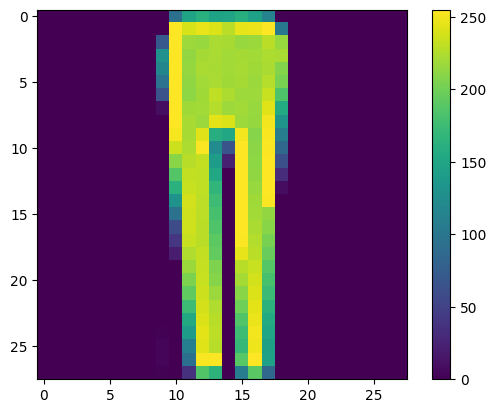

In [10]:
plt.figure()
plt.imshow(x_train[1802])
plt.colorbar()
plt.grid(False)


Data normalize

In [11]:
x_train = x_train / 255
x_test = x_test / 255

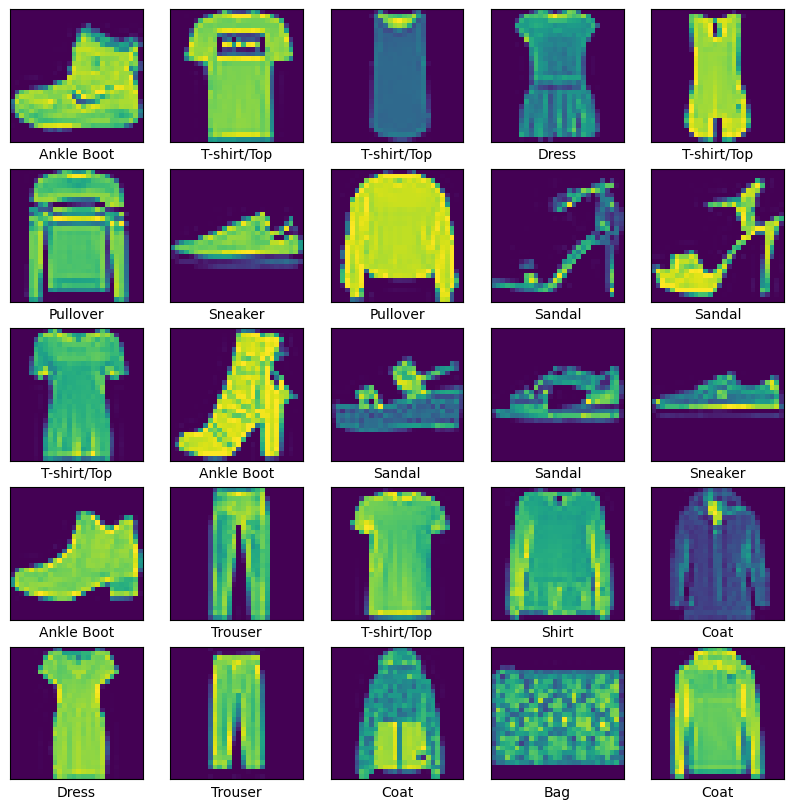

In [15]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

Creating Neural Network

In [19]:
model = keras.Sequential([
              keras.layers.Flatten(input_shape=(28,28)),
              keras.layers.Dense(128, activation='relu'),
              keras.layers.Dense(10, activation='softmax')
])

Model Compilation

In [24]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Teaching Model

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7405 - accuracy: 0.7589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5093 - accuracy: 0.8262
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4667 - accuracy: 0.8389
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4425 - accuracy: 0.8470
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4244 - accuracy: 0.8535
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4111 - accuracy: 0.8568
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3998 - accuracy: 0.8619
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3904 - accuracy: 0.8652
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3826 - accuracy: 0.8658
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.374

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4214 - accuracy: 0.8508
Test accuracy: 0.8507999777793884


Predict with model

In [28]:
prediction =  model.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


In [29]:
prediction[0]

array([2.6092593e-08, 1.1329492e-09, 2.7153618e-10, 2.3314368e-09,
       3.0050526e-10, 1.4653856e-04, 2.5562112e-08, 7.4498414e-04,
       2.7035034e-05, 9.9908137e-01], dtype=float32)

In [32]:
class_names[np.argmax(prediction[0])]

'Ankle Boot'

In [33]:
class_names[y_train[0]]

'Ankle Boot'